In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist

In [3]:
#Splitting data into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('x_train:{}'.format(x_train.shape))
print('y_train:{}'.format(y_train.shape))
print('x_test :{}'.format(x_test.shape))
print('y_test :{}'.format(y_test.shape))

x_train:(60000, 28, 28)
y_train:(60000,)
x_test :(10000, 28, 28)
y_test :(10000,)


In [5]:
#Image Dimensions
rows,cols = 28,28
class_names = ['0','1','2','3','4','5','6','7','8','9']

#Reshaping the Image
x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
input_shape = (1, rows, cols)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Preprocessing the data
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
x_train.shape

(60000, 28, 28)

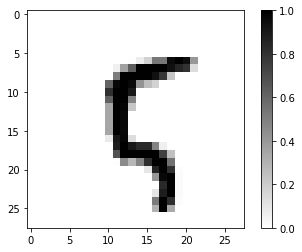

In [8]:
#Visualizing the Data
plt.figure()
plt.imshow(x_train[100], cmap = plt.cm.binary , interpolation = 'nearest')
plt.colorbar()
plt.grid(False)
plt.show()

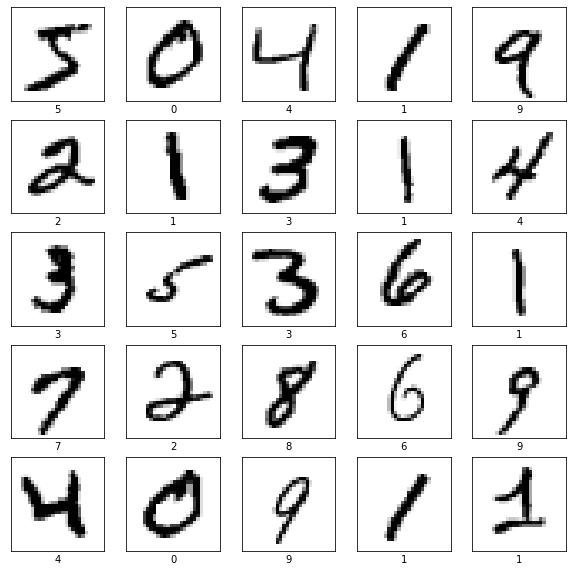

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
#reshape data to fit model
X_train = x_train.reshape(60000,28,28,1)
X_test = x_test.reshape(10000,28,28,1)

In [11]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
#Build The Model
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=5, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
   # keras.layers.BatchNormalization(),
    #keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
# Take a look at the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 32)        51232     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3872)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 3872)              15488     
_________________________________________________________________
dropout_19 (Dropout)         (None, 3872)             

In [37]:
#Compile The Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
#Train the Model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=12,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 198s 3ms/sample - loss: 0.2248 - acc: 0.9335 - val_loss: 0.0644 - val_acc: 0.9838
Epoch 2/12
60000/60000 [==============================] - 191s 3ms/sample - loss: 0.0827 - acc: 0.9747 - val_loss: 0.0390 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 188s 3ms/sample - loss: 0.0619 - acc: 0.9810 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 194s 3ms/sample - loss: 0.0565 - acc: 0.9821 - val_loss: 0.0328 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 195s 3ms/sample - loss: 0.0509 - acc: 0.9841 - val_loss: 0.0279 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 194s 3ms/sample - loss: 0.0424 - acc: 0.9865 - val_loss: 0.0242 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 192s 3ms/sample - loss: 0.0434 - acc: 0.9869 - val_l

In [39]:
#Accuracy and Loss
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('Test Accuracy: %.2f' % (test_acc*100))
print('\nTest Loss: %.2f' % (test_loss))

train_loss, train_acc = model.evaluate(X_train,  y_train, verbose = 0)
print('\nTraining accuracy: %.2f\n ' %(train_acc*100))

Test Accuracy: 99.28

Test Loss: 0.02

Training accuracy: 99.70
 


#### Test Accuracy: 99.28

#### Test Loss: 0.02

#### Training accuracy: 99.70

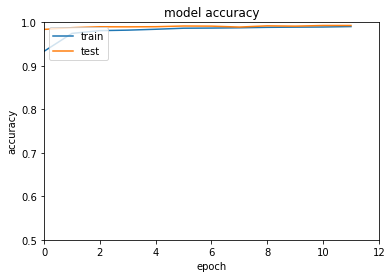

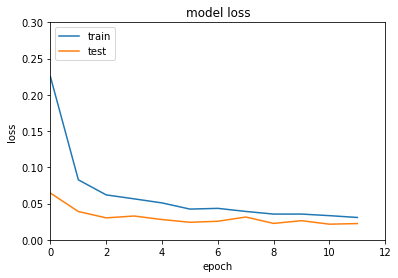

In [41]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,12,0.50,1.00])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0.0,12,0.0,0.3])
plt.show()